This program generates the bifurcation plots from the data generated through parameter continuation. on data obtained through parameter continuation. It processes the data files s.Example5_a, s.Example5_b and plots the ordinate ($ m(0) $) against the parameter ($\theta_{o}$). The stability information is not represented here. The stability transitions near the folds can be established using the information provided in the article. However, the stability index of the initial solution must be known beforehand. Additionally, the program visualizes elastica shapes for selected labels, which can be identified from the Auto-07p terminal output.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
#Python code for plotting the bifurcation diagrams from the continuum solutions "s.Example5_b and "s.Example5_b". This code only provides the plots. The stability of the branches must be established using the theory ffrom the article. 
#
Lam1=[]
filename="s.Example5_a"
f=open(filename,"r")
m1=[];
Nl=1
s=[];
S=[];
X=[];
Y=[];
x=[];
y=[];
Psi=[];
Alf=[];
Eps=[];
Th=[];
while(1):
    A=f.readline()
    if (A==''):
        break
    K=A.split()
    for i in range(0,int(K[8])-1):
        B=f.readline()
        Bb=B.split()

        if ( i< (int(K[6])*Nl) ):
            x.append(float(Bb[1]))
            y.append(float(Bb[2]))

        if (i== 0):	
            m1.append(float(Bb[6]));  

        if (i== (int(K[6])*Nl)-1):	
            Th.append(float(Bb[5]))

    B=f.readline();
    Bb=B.split()
    Lam1.append(float(Bb[4]))
    
    Alf.append(Bb[3])
    Eps.append(float(Bb[0]))
    Psi.append(float(Bb[1]))
    X.append(x)
    Y.append(y)
    x=[]
    y=[]

Lam2=[]
filename="s.Example5_b"
f=open(filename,"r")
m2=[];
S=[];
while(1):
    A=f.readline()
    if (A==''):
        break
    K=A.split()
    for i in range(0,int(K[8])-1):
        B=f.readline()
        Bb=B.split()
        if (i== 0):	
            m2.append(float(Bb[6]));  

    B=f.readline();
    Bb=B.split()
    Lam2.append(float(Bb[4]))
    #S.append(s)
    s=[]

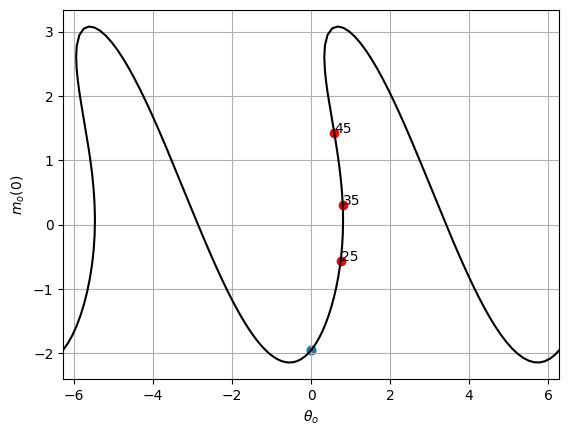

The bifurcation plot along with the points of interest


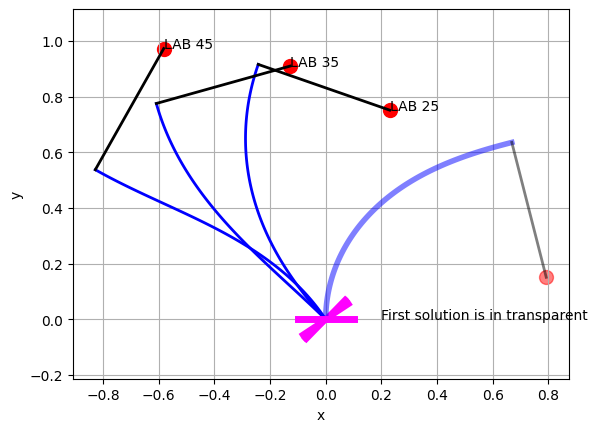

The Elastica configurations of selected points.


In [34]:
LAB=[25,35,45];  # These labels can be chosen after monitoring the Auto-07p run in the terminal

plt.plot(Lam1,m1,color='k')
plt.plot(Lam2,m2,color='k')
plt.scatter([Lam1[0],Lam2[0]],[m1[0],m2[0]])
for j in range(0,len(LAB)):
    plt.scatter([Lam1[LAB[j]]],[m1[LAB[j]]],color='r')
    plt.text(Lam1[LAB[j]],m1[LAB[j]], str(LAB[j]))
plt.grid()
plt.xlim([-12.56*0.5,12.56*0.5])
plt.xlabel("$\\theta_{o} $")
plt.ylabel("$m_{o}(0) $")
plt.show()
print('The bifurcation plot along with the points of interest')

#Add the Labels of interest from the continuation solutions to obtain the elastica configurations
b=0.1;
for j in range(0,len(LAB)):
    i=LAB[j];
    plt.plot(X[i],Y[i],color='b',linewidth=2)
    plt.plot([X[i][-1], X[i][-1] + Eps[i]*np.cos(Psi[i])*(-np.sin(Th[i])) +  Eps[i]*np.sin(Psi[i])*np.cos(Th[i])],[Y[i][-1], Y[i][-1] +  Eps[i]*np.cos(Psi[i])*np.cos(Th[i]) +  Eps[i]*np.sin(Psi[i])*np.sin(Th[i])],color='k',linewidth=2)
    plt.scatter([ X[i][-1] + Eps[i]*np.cos(Psi[i])*(-np.sin(Th[i])) +  Eps[i]*np.sin(Psi[i])*np.cos(Th[i])],[ Y[i][-1] +  Eps[i]*np.cos(Psi[i])*np.cos(Th[i]) +  Eps[i]*np.sin(Psi[i])*np.sin(Th[i])], color='red', s=100)
    plt.plot([-b*np.cos(Lam1[i]),b*np.cos(Lam1[i])],[-b*np.sin(Lam1[i]),b*np.sin(Lam1[i])],color='magenta',linewidth=4)
    plt.text(X[i][-1] + Eps[i]*np.cos(Psi[i])*(-np.sin(Th[i])) +  Eps[i]*np.sin(Psi[i])*np.cos(Th[i]), Y[i][-1] +  Eps[i]*np.cos(Psi[i])*np.cos(Th[i]) +  Eps[i]*np.sin(Psi[i])*np.sin(Th[i]), 'LAB ' + str(i) )
    
i=0
plt.plot(X[0],Y[0],color='b',linewidth=4,alpha=0.5)
plt.plot([X[0][-1], X[0][-1] + Eps[i]*np.cos(Psi[i])*(-np.sin(Th[i])) +  Eps[i]*np.sin(Psi[i])*np.cos(Th[i])],[Y[0][-1], Y[0][-1] +  Eps[i]*np.cos(Psi[i])*np.cos(Th[i]) +  Eps[i]*np.sin(Psi[i])*np.sin(Th[i])],color='k',linewidth=2,alpha=0.5)
plt.scatter([ X[i][-1] + Eps[i]*np.cos(Psi[i])*(-np.sin(Th[i])) +  Eps[i]*np.sin(Psi[i])*np.cos(Th[i])],[ Y[i][-1] +  Eps[i]*np.cos(Psi[i])*np.cos(Th[i]) +  Eps[i]*np.sin(Psi[i])*np.sin(Th[i])], color='red', s=100,alpha=0.5)
plt.plot([-b*np.cos(Lam1[i]),b*np.cos(Lam1[i])],[-b*np.sin(Lam1[i]),b*np.sin(Lam1[i])],color='magenta',linewidth=5)

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.text(0.2,0.0,'First solution is in transparent')
plt.axis('equal')
plt.show()
print('The Elastica configurations of selected points.')

In [22]:
C="A"
F=char(A)
C+F

NameError: name 'char' is not defined